## Imports ##

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.manifold import TSNE


import pandas as pd
import pickle
import numpy as np

#### Load Datasets

In [2]:
# drugs
drugs = pd.read_csv('./data/drugs.csv', index_col=1)
drugs.drop(['Unnamed: 0'], axis=1, inplace=True)

# cell lines
cell_lines = pd.read_csv('./data/gene_expression.csv', index_col=0)

# combinations
combinations = pd.read_csv('./data/combinations.csv', index_col=0)

In [3]:
# reduce cell lines to the 2128 most important genes

with open('./data/2128_genes.pkl', 'rb') as f:
    top_genes = pickle.load(f)

filtered_cell_lines = cell_lines[cell_lines.columns.intersection(top_genes)]

In [4]:
filtered_cell_lines

,FUCA2,GCLC,STPG1,CYP26B1,NDUFAB1,ABCB5,DVL2,HOXA11,COPZ2,CREBBP,...,ATP6V1E2,ZNF345,ATXN7L3B,PRKDC,PBOV1,OR13A1,ZNF253,MRPL46,OR1D5,MYH4
HCC1954,7.553067,9.280913,3.372573,3.777488,10.985991,2.902166,4.193197,3.967413,3.356586,5.688428,...,5.120570,4.638312,5.598942,5.947629,3.032667,3.229141,4.110379,8.629097,3.228033,2.632448
HCC1143,8.440833,8.005206,3.920152,3.210161,10.541755,2.877320,5.040755,6.764679,4.920267,5.519528,...,4.663152,3.235018,6.002967,6.837048,3.135009,3.479925,3.393041,7.479672,3.238828,2.564325
HCC1187,5.551352,5.032812,3.528140,3.247300,10.967920,2.934802,4.944361,2.851308,3.645263,5.802317,...,4.656409,5.170385,6.394137,6.492606,3.192293,3.580566,6.013642,8.186395,3.350337,2.914548
HCC1395,8.245466,5.650228,4.185011,3.259254,11.115642,2.933936,5.516593,3.286230,3.768223,5.700710,...,5.917166,3.719701,5.434950,6.151482,3.192478,3.430052,3.542136,8.426703,3.334150,2.641512
HCC1599,7.464137,6.321866,3.531019,5.513162,11.556747,2.998914,4.427619,4.466376,3.336529,6.209780,...,5.204575,6.172346,6.329224,7.900965,2.989608,3.189426,5.394498,8.710373,3.201282,2.749716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NCC010,8.031837,6.249088,3.978721,2.909780,11.181177,2.976709,4.335160,3.422648,3.871866,5.911000,...,3.595436,2.765286,5.695328,7.166143,2.982351,3.260054,3.129891,8.034300,3.532607,2.621257
RCC-JW,7.988237,4.217507,3.394038,2.684415,10.388300,3.006199,5.041662,3.457660,7.311520,4.917703,...,3.836706,4.589799,5.231567,6.250817,2.912933,3.436972,3.731778,8.165442,3.789976,2.609469
MM1S,6.453126,5.564713,3.394151,3.028858,11.651180,3.102640,5.167779,2.848341,4.205521,6.021638,...,3.983349,4.146940,5.640954,6.672501,3.203864,3.294515,4.703204,8.485069,3.427507,2.669626
SNU-61,8.947314,6.013510,3.725530,3.029182,11.244912,3.123017,4.957366,5.788725,4.130588,6.112583,...,4.522754,2.724952,5.866326,5.720577,3.067657,3.452590,3.529156,8.440759,3.312884,2.772584


### Merge data

In [5]:
drugs

,Drug
Drug_ID,
Camptothecin,CC[C@@]1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=...
Vinblastine,CC[C@@]1(CC2C[C@@](C3=C(CCN(C2)C1)C4=CC=CC=C4N...
Cisplatin,N.N.[Cl-].[Cl-].[Pt+2]
Cytarabine,C1=CN(C(=O)N=C1N)[C@H]2[C@H]([C@@H]([C@H](O2)C...
Docetaxel,CC1=C2[C@H](C(=O)[C@@]3([C@H](C[C@@H]4[C@]([C@...
...,...
LJI308,C1COCCN1C2=CC=C(C=C2)C3=C(C=NC=C3)C4=CC(=C(C(=...
GSK591,C1CC(C1)NC2=NC=CC(=C2)C(=O)NC[C@@H](CN3CCC4=CC...
VE821,CS(=O)(=O)C1=CC=C(C=C1)C2=CN=C(C(=N2)C(=O)NC3=...


### Drugs Fingerprints ###

In [6]:
# transform smiles to fingerprints
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import MACCSkeys

def smiles_to_fingerprint(smiles):
    mol = Chem.MolFromSmiles(smiles)
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=512)
    return fp

def smiles_to_maccs(smiles):
    mol = Chem.MolFromSmiles(smiles)
    fp = MACCSkeys.GenMACCSKeys(mol)
    return fp

drugs['Drug'] = drugs['Drug'].apply(smiles_to_maccs)
drugs

,Drug
Drug_ID,
Camptothecin,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
Vinblastine,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
Cisplatin,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
Cytarabine,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
Docetaxel,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, ..."
...,...
LJI308,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
GSK591,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."
VE821,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


Add fingerprints to the dataset as features

In [7]:
drugs = pd.concat([drugs.drop(['Drug'], axis=1), drugs['Drug'].apply(lambda x: pd.Series({f'fp{str(i)}': val for i, val in enumerate(x)}))], axis=1)
drugs

,fp0,fp1,fp2,fp3,fp4,fp5,fp6,fp7,fp8,fp9,...,fp157,fp158,fp159,fp160,fp161,fp162,fp163,fp164,fp165,fp166
Drug_ID,,,,,,,,,,,,,,,,,,,,,
Camptothecin,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
Vinblastine,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
Cisplatin,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
Cytarabine,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,1,1,1,1,1,0
Docetaxel,0,0,0,0,0,0,0,0,1,0,...,1,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LJI308,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,1,1,1,1,1,0
GSK591,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,1,1,1,1,1,0
VE821,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,1,0


In [8]:
# merge cell lines and drugs considering the combinations
final_df = pd.merge(combinations, drugs, on='Drug_ID')
final_df = pd.merge(final_df, filtered_cell_lines, left_on='Cell Line_ID', right_index=True, how = 'inner')
final_df.index = final_df['Drug_ID'] + '_' + final_df['Cell Line_ID']
final_df

,Drug_ID,Cell Line_ID,Y,fp0,fp1,fp2,fp3,fp4,fp5,fp6,...,ATP6V1E2,ZNF345,ATXN7L3B,PRKDC,PBOV1,OR13A1,ZNF253,MRPL46,OR1D5,MYH4
Camptothecin_HCC1954,Camptothecin,HCC1954,-0.251083,0,0,0,0,0,0,0,...,5.120570,4.638312,5.598942,5.947629,3.032667,3.229141,4.110379,8.629097,3.228033,2.632448
Vinblastine_HCC1954,Vinblastine,HCC1954,-3.058914,0,0,0,0,0,0,0,...,5.120570,4.638312,5.598942,5.947629,3.032667,3.229141,4.110379,8.629097,3.228033,2.632448
Cisplatin_HCC1954,Cisplatin,HCC1954,5.005908,0,0,0,0,0,0,0,...,5.120570,4.638312,5.598942,5.947629,3.032667,3.229141,4.110379,8.629097,3.228033,2.632448
Cytarabine_HCC1954,Cytarabine,HCC1954,3.947056,0,0,0,0,0,0,0,...,5.120570,4.638312,5.598942,5.947629,3.032667,3.229141,4.110379,8.629097,3.228033,2.632448
Docetaxel_HCC1954,Docetaxel,HCC1954,-4.177968,0,0,0,0,0,0,0,...,5.120570,4.638312,5.598942,5.947629,3.032667,3.229141,4.110379,8.629097,3.228033,2.632448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MK-2206_HCC202,MK-2206,HCC202,1.585069,0,0,0,0,0,0,0,...,5.509141,4.717170,6.264891,5.572891,2.870909,3.351663,4.704318,8.333207,3.714531,2.647746
Palbociclib_HCC202,Palbociclib,HCC202,4.867165,0,0,0,0,0,0,0,...,5.509141,4.717170,6.264891,5.572891,2.870909,3.351663,4.704318,8.333207,3.714531,2.647746
Pictilisib_HCC202,Pictilisib,HCC202,0.583059,0,0,0,0,0,0,0,...,5.509141,4.717170,6.264891,5.572891,2.870909,3.351663,4.704318,8.333207,3.714531,2.647746
5-Fluorouracil_HCC202,5-Fluorouracil,HCC202,5.998151,0,0,0,0,0,0,0,...,5.509141,4.717170,6.264891,5.572891,2.870909,3.351663,4.704318,8.333207,3.714531,2.647746


In [9]:
output = final_df['Y']
input = final_df.drop(['Drug_ID', 'Cell Line_ID', 'Y'], axis=1)


All the data was already standardized and scaled in the original dataset (Therapeutic Data Commons)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(input, output, test_size=0.3, random_state=42)

In [11]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((64420, 2256), (64420,), (27609, 2256), (27609,))

In [12]:
x_train

,fp0,fp1,fp2,fp3,fp4,fp5,fp6,fp7,fp8,fp9,...,ATP6V1E2,ZNF345,ATXN7L3B,PRKDC,PBOV1,OR13A1,ZNF253,MRPL46,OR1D5,MYH4
Foretinib_SU-DHL-5,0,0,0,0,0,0,0,0,0,0,...,4.691279,4.588879,6.115306,7.192039,3.113060,3.845969,4.334785,8.598431,4.148634,2.790745
AZD5582_KYSE-510,0,0,0,0,0,0,0,0,0,0,...,5.806667,3.010023,6.071624,7.296508,2.852123,3.254496,3.603477,9.315939,3.656085,2.557605
GSK1904529A_LAMA-84,0,0,0,0,0,0,0,0,0,0,...,4.053422,6.007190,6.427173,7.604878,2.954750,3.228966,3.339378,9.219408,3.217167,2.776306
AZD7762_KYSE-410,0,0,0,0,0,0,0,0,0,0,...,4.096737,2.847874,6.208649,7.328019,2.903004,3.287460,3.438245,7.949132,3.549288,2.461553
GDC0810_HCC1937,0,0,0,0,0,0,0,0,0,0,...,4.840922,5.034253,5.504598,6.408040,2.946172,3.402678,4.110709,7.456525,3.580119,2.615916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PFI3_SW1463,0,0,0,0,0,0,0,0,0,0,...,4.793499,4.738768,6.726044,5.808590,2.832737,3.678759,4.410979,8.231673,3.377068,3.009807
I-BRD9_SW1710,0,0,0,0,0,0,0,0,0,0,...,3.964336,4.023004,5.336447,6.466790,2.940953,3.332759,3.889705,7.408880,3.686703,2.593133
Olaparib_RERF-GC-1B,0,0,0,0,0,0,0,0,0,0,...,5.960230,6.854925,6.428696,6.726985,2.792515,3.375117,3.350753,8.907326,3.454210,2.510775
Crizotinib_HCC2218,0,0,0,0,0,0,0,0,0,0,...,4.061743,3.632399,6.157377,6.432589,3.374558,3.612480,3.698259,8.743277,3.809671,2.523288


## Clustering

Hierarchical clustering was employed as a method to uncover some of the less complex relations within our data. For example, with tissue data, we can group our gene samples with their correspondent tissue and check how similar or different the samples can be within the same tissue.

In [216]:
cell_lines_info = pd.read_csv('./data/updated_cell_lines_info.csv', index_col=0)

In [217]:
cell_lines_info.insert(0, 'Cell Line_ID', cell_lines_info.index)

In [218]:
cell_lines_info

,Cell Line_ID,Cell Line,Tissue,Tissue sub-type,Count,Mean_Y,Datasets
Cell Line_ID,,,,,,,
MDA-MB-157,MDA-MB-157,[ 5.50020891 3.10477592 10.91037142 ... 9.78...,breast,breast,136,3.126755,GDSC2
CAMA-1,CAMA-1,[ 6.90040711 2.72616293 9.57820681 ... 10.13...,breast,breast,136,2.595224,GDSC2
MDA-MB-231,MDA-MB-231,[ 7.78398332 2.84512339 10.04780926 ... 9.16...,breast,breast,136,2.527992,GDSC2
MDA-MB-415,MDA-MB-415,[ 6.3918087 2.84384587 10.27915458 ... 9.42...,breast,breast,136,2.463053,GDSC2
HCC38,HCC38,[ 7.45295425 2.88491739 10.17332196 ... 9.29...,breast,breast,136,3.554996,GDSC2
...,...,...,...,...,...,...,...
KYSE-510,KYSE-510,[ 7.74994459 2.62686567 10.29167567 ... 8.68...,aero_digestive_tract,oesophagus,28,2.318249,GDSC2
ECC12,ECC12,[ 6.30201645 2.96231026 10.02490954 ... 9.19...,digestive_system,stomach,26,3.393325,GDSC2
COR-L95,COR-L95,[5.36293426 2.55592993 9.63412195 ... 9.252285...,lung,lung_small_cell_carcinoma,20,1.215786,GDSC2


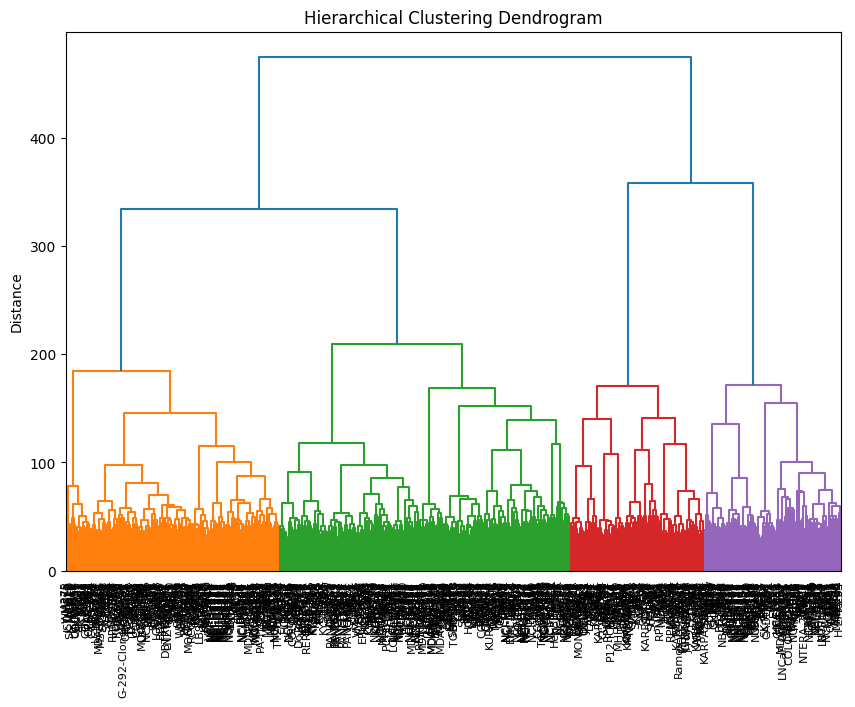

In [219]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
 
# hierarchical clustering
Z = linkage(filtered_cell_lines, method='ward')

# plotting the dendrogram
plt.figure(figsize=(10, 7))
plt.title("Hierarchical Clustering Dendrogram")
dendrogram(Z, labels=filtered_cell_lines.index, leaf_rotation=90, leaf_font_size=8)
plt.ylabel('Distance')
plt.show()

Since the number of samples is high, the interpretability in this hierarquical clustering is inexistent. To fix this we sampled our dataframe for only 100 samples so we can have a better chance at examining the dendogram.

In [220]:
cell_lines_info = pd.read_csv('./data/updated_cell_lines_info.csv')

In [221]:
cell_lines_info

,Cell Line_ID,Cell Line,Tissue,Tissue sub-type,Count,Mean_Y,Datasets
0,MDA-MB-157,[ 5.50020891 3.10477592 10.91037142 ... 9.78...,breast,breast,136,3.126755,GDSC2
1,CAMA-1,[ 6.90040711 2.72616293 9.57820681 ... 10.13...,breast,breast,136,2.595224,GDSC2
2,MDA-MB-231,[ 7.78398332 2.84512339 10.04780926 ... 9.16...,breast,breast,136,2.527992,GDSC2
3,MDA-MB-415,[ 6.3918087 2.84384587 10.27915458 ... 9.42...,breast,breast,136,2.463053,GDSC2
4,HCC38,[ 7.45295425 2.88491739 10.17332196 ... 9.29...,breast,breast,136,3.554996,GDSC2
...,...,...,...,...,...,...,...
800,KYSE-510,[ 7.74994459 2.62686567 10.29167567 ... 8.68...,aero_digestive_tract,oesophagus,28,2.318249,GDSC2
801,ECC12,[ 6.30201645 2.96231026 10.02490954 ... 9.19...,digestive_system,stomach,26,3.393325,GDSC2
802,COR-L95,[5.36293426 2.55592993 9.63412195 ... 9.252285...,lung,lung_small_cell_carcinoma,20,1.215786,GDSC2
803,LNZTA3WT4,[ 4.86934974 2.6468088 10.1320681 ... 9.74...,nervous_system,glioma,19,1.295439,GDSC2


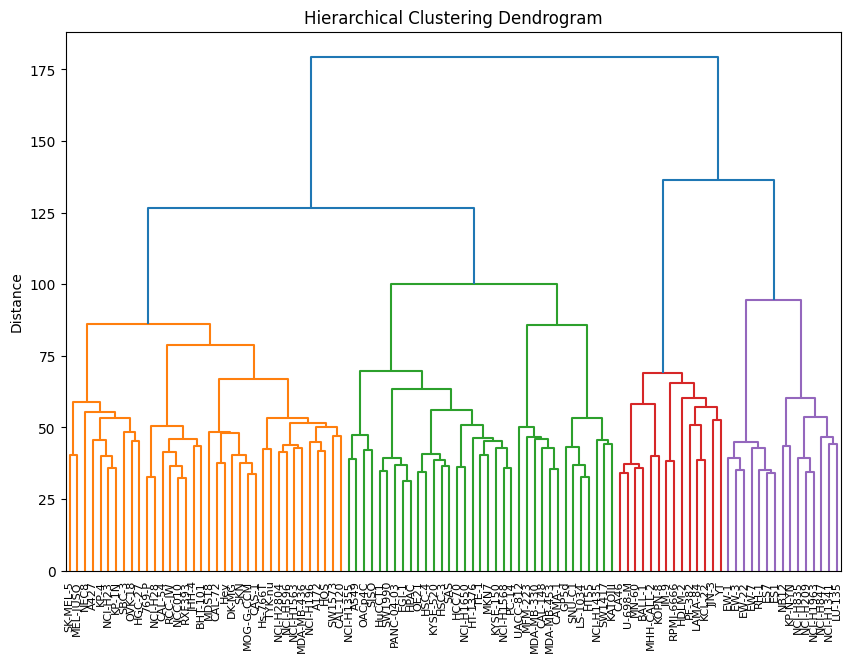

In [222]:
sampled_df = filtered_cell_lines.sample(n=100, random_state=42)
Z = linkage(sampled_df, method='ward')

plt.figure(figsize=(10, 7))
plt.title("Hierarchical Clustering Dendrogram")
dendrogram(Z, labels=sampled_df.index, leaf_rotation=90, leaf_font_size=8)
plt.ylabel('Distance')
plt.show()

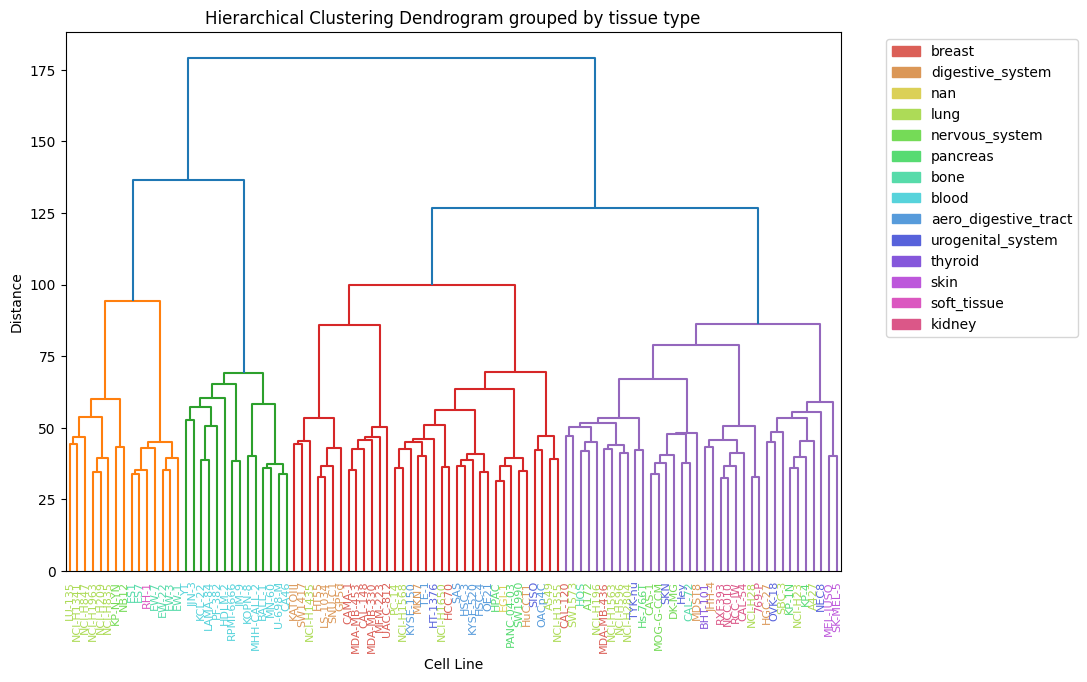

In [223]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib.colors import rgb2hex, to_rgba
import random
from matplotlib.patches import Patch

# tissue_data = pd.read_excel('./data/tissue.xlsx', index_col=0)
linked = linkage(sampled_df, 'ward')
unique_sites = cell_lines_info['Tissue'].unique()
palette = sns.color_palette('hls',len(unique_sites)) 

# color dictionary 
color_dict = {tissue: rgb2hex(color) for tissue, color in zip(unique_sites, palette)}
#print(color_dict)

# mapping each cell line to its tissue color
tissue_colors = cell_lines_info.set_index('Cell Line_ID')['Tissue'].map(color_dict)

plt.figure(figsize=(10, 7))
dendro = dendrogram(linked,
                    orientation='top',
                    labels=sampled_df.index,
                    distance_sort='descending',
                    show_leaf_counts=True,
                    leaf_rotation=90,
                    leaf_font_size=8,
                    )

# apply gradient 
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
num_labels = len(xlbls)
for i, lbl in enumerate(xlbls):
    lbl.set_color(to_rgba(tissue_colors[lbl.get_text()], alpha=1))

plt.ylabel('Distance')
plt.xlabel('Cell Line')
plt.title('Hierarchical Clustering Dendrogram grouped by tissue type')

# Create a list of Patch objects, one for each unique color
legend_patches = [Patch(color=color, label=tissue) for tissue, color in color_dict.items()]

# Add the legend to your plot
plt.legend(handles=legend_patches, bbox_to_anchor=(1.05, 1), loc='upper left')

# The rest of your plotting code...

plt.show()

For better understanding of the data, we performed a hierarchical clustering of the cell lines. We cross-matched the cell lines with the tissue type to understand if the clustering was tissue-specific. Overall, we found some overlap between the tissue types, but there was a clear cluster seperation of the blood cell lines. This means that the blood cell lines are more similar to each other than to the other cell lines.

From the elbow method it is possible to see that the best number of clusters is 4.

## PCA

In [13]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
pca = PCA(n_components=0.95)
pca.fit(input)

cumulative_variance_ratio = pca.explained_variance_ratio_.cumsum()

number of componets for 95% explaned variance: 430


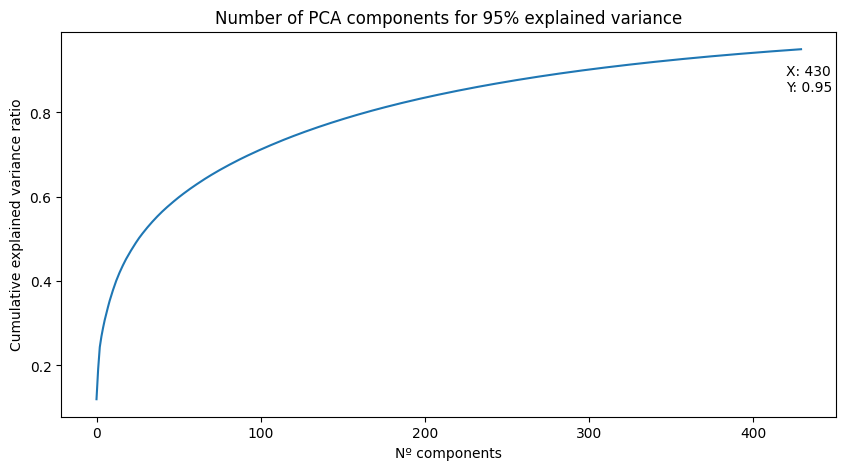

In [15]:
# number if pca for 0.95 variance
print(f'number of componets for 95% explaned variance:', pca.n_components_)

# plot cumulative variance

plt.figure(figsize=(10, 5))
plt.plot(cumulative_variance_ratio)
plt.xlabel('Nº components')
plt.ylabel('Cumulative explained variance ratio')
plt.title(f'Number of PCA components for 95% explained variance')
# Add the last x and y values to the plot
last_x = pca.n_components_
last_y = cumulative_variance_ratio[-1]

offset_x = 10
offset_y = 0.1

plt.text(last_x - offset_x, last_y - offset_y, f'X: {last_x} \nY: {last_y:.2f}')

plt.show()                            


To explain 95% of the variance, it's needed 430 components from the original 2259. This means that the data is very sparse and that the features are not very correlated.

In [16]:
pca = PCA(n_components=0.8)
pca.fit(input)

cumulative_variance_ratio = pca.explained_variance_ratio_.cumsum()
print('Var. explicada: %s'% str(pca.explained_variance_ratio_))
print('Soma:', sum(pca.explained_variance_ratio_) * 100, '%')
# number if pca for 80% variance
print('number of componets for explaned variance:', pca.n_components_)

Var. explicada: [0.11978168 0.07147367 0.05228081 0.02526206 0.02052816 0.01835545
 0.0159642  0.01504164 0.01450037 0.01290067 0.01217824 0.01158158
 0.01088883 0.00988705 0.00927269 0.00860955 0.00830396 0.00787202
 0.0075605  0.00690418 0.00679983 0.00658434 0.00634307 0.00624377
 0.0060326  0.00582674 0.00564981 0.00526342 0.00503139 0.0049167
 0.00481976 0.00474297 0.00456062 0.00445656 0.00438918 0.00422646
 0.00417833 0.00409439 0.00397435 0.00388481 0.00372159 0.00366855
 0.00353796 0.00351332 0.00342342 0.00334429 0.00333404 0.00327828
 0.00326996 0.00318745 0.00311316 0.00306842 0.00298985 0.0029516
 0.00290156 0.00286073 0.00283823 0.00279792 0.00274324 0.00269492
 0.00265014 0.0026415  0.00260816 0.00257816 0.0025514  0.00254132
 0.00251659 0.00244444 0.00243065 0.00237442 0.00234948 0.00230781
 0.00228309 0.00227075 0.00225437 0.00223696 0.00217841 0.00215301
 0.00214775 0.00211384 0.00209693 0.00208917 0.00206328 0.00204319
 0.00204066 0.00199808 0.00197121 0.00196572 0.0

Each line in ``pca.components_`` represents a principal component and, each column, represents a feature. The value of each position represents the weight of the feature at the corresponding principal component.

In [17]:
feature_names = list(input.columns.values)

i = 0
for i, pc in enumerate(pca.components_):
    print(f"Principal component {i+1}:")
    
    # obter pesos das features
    pc_weights = dict(zip(feature_names, pc))
    
    # ordenar features pelo peso
    pc_weights_sorted = sorted(pc_weights.items(), key=lambda x: abs(x[1]), reverse=True)
    
    # top 5 features
    for j in range(5):
        feature, weight = pc_weights_sorted[j]
        print(f"\t{feature}: {weight:.3f}")
    
    i += 1
    if i == 15:
        break
    
    print()

Principal component 1:
	S100A16: -0.181
	IER3: -0.145
	SDC4: -0.144
	PLK2: -0.130
	F3: -0.125

Principal component 2:
	CLDN4: 0.167
	GPR160: 0.133
	PTN: -0.129
	CDH1: 0.126
	FGFBP1: 0.120

Principal component 3:
	BST2: -0.164
	LPXN: -0.154
	ARHGDIB: -0.153
	TFF3: 0.141
	SAMD9: -0.132

Principal component 4:
	FGFBP1: -0.160
	F3: -0.130
	TESC: 0.129
	DUSP4: 0.122
	ARHGDIB: -0.117

Principal component 5:
	TESC: -0.127
	AKAP12: -0.126
	BST2: 0.121
	TNFSF10: 0.118
	S100A8: 0.114

Principal component 6:
	IRX3: 0.160
	IRX5: 0.138
	REC8: -0.132
	AKAP12: -0.131
	LAMA3: -0.116

Principal component 7:
	MMP1: 0.140
	TFF3: -0.136
	GPRC5C: -0.129
	CA12: -0.126
	MYLK: -0.124

Principal component 8:
	S100A4: 0.181
	BLNK: -0.160
	PYCARD: 0.149
	CHST11: 0.134
	CAPG: 0.133

Principal component 9:
	DUSP4: -0.204
	CSAG1: -0.158
	ST3GAL6: -0.110
	PTN: -0.106
	PHLDA1: -0.105

Principal component 10:
	ARHGDIB: -0.154
	CYP1B1: 0.135
	TNFSF10: 0.132
	TFF3: -0.123
	KIF21A: 0.117

Principal component 11:
	SAMD5: 

To explain 80% of the variance, it's needed 96 components from the original 2259. In this case, this is a considerable reduction of the dimensionality.

### PCA train and test

In [231]:
pca = PCA(n_components=20)
pca.fit(x_train)
x_train_pca = pca.transform(x_train)

cumulative_variance_ratio = pca.explained_variance_ratio_.cumsum()
print('Var. explicada: %s'% str(pca.explained_variance_ratio_))
print('Soma:', sum(pca.explained_variance_ratio_) * 100, '%')
# number if pca for 80% variance
print('numeber of componets for explaned variance:', pca.n_components_)

Var. explicada: [0.11967293 0.07153086 0.05222462 0.02536876 0.02052103 0.01837947
 0.015982   0.01502919 0.0145132  0.01291107 0.01218216 0.01159777
 0.01083059 0.00985311 0.00925677 0.00856585 0.00832782 0.00783304
 0.00756711 0.00680642]
Soma: 45.89537616485013 %
numeber of componets for explaned variance: 20


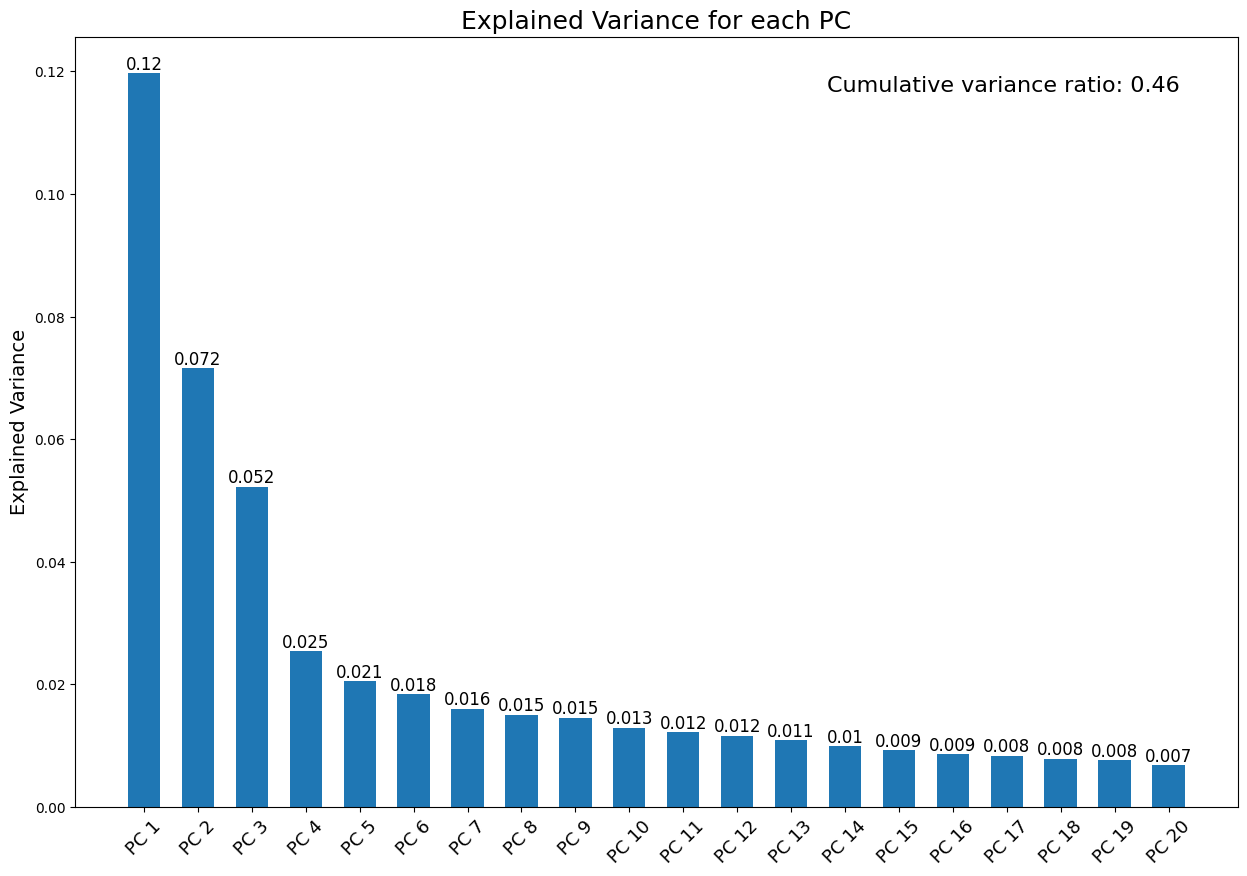

In [232]:
plt.figure(figsize=(15, 10))
bars = plt.bar(range(1, 21), pca.explained_variance_ratio_, width=0.6)
plt.ylabel('Explained Variance', fontsize=14)
plt.title('Explained Variance for each PC', fontsize=18)
# Set the x-labels to the component numbers
plt.xticks(range(1, 21), labels=[f'PC {i}' for i in range(1, 21)], rotation=45, fontsize=13)

# Add labels to each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom', fontsize=12)

plt.text(0.95, 0.95, f'Cumulative variance ratio: {cumulative_variance_ratio[-1]:.2f}', 
         ha='right', va='top', transform=plt.gca().transAxes, fontsize=16)

plt.show()

The cumulative variance ratio of the 20 PC explain 46% of the variance, and the first 2 PC only explains 19.2% of the variance. This means that the data is very complex with high dimensionality.

In [233]:
#pca train
pca = PCA(n_components=3)
pca.fit(x_train)
x_train_pca = pca.transform(x_train)

#pca test
pca = PCA(n_components=3)
pca.fit(x_test)
x_test_pca = pca.transform(x_test)

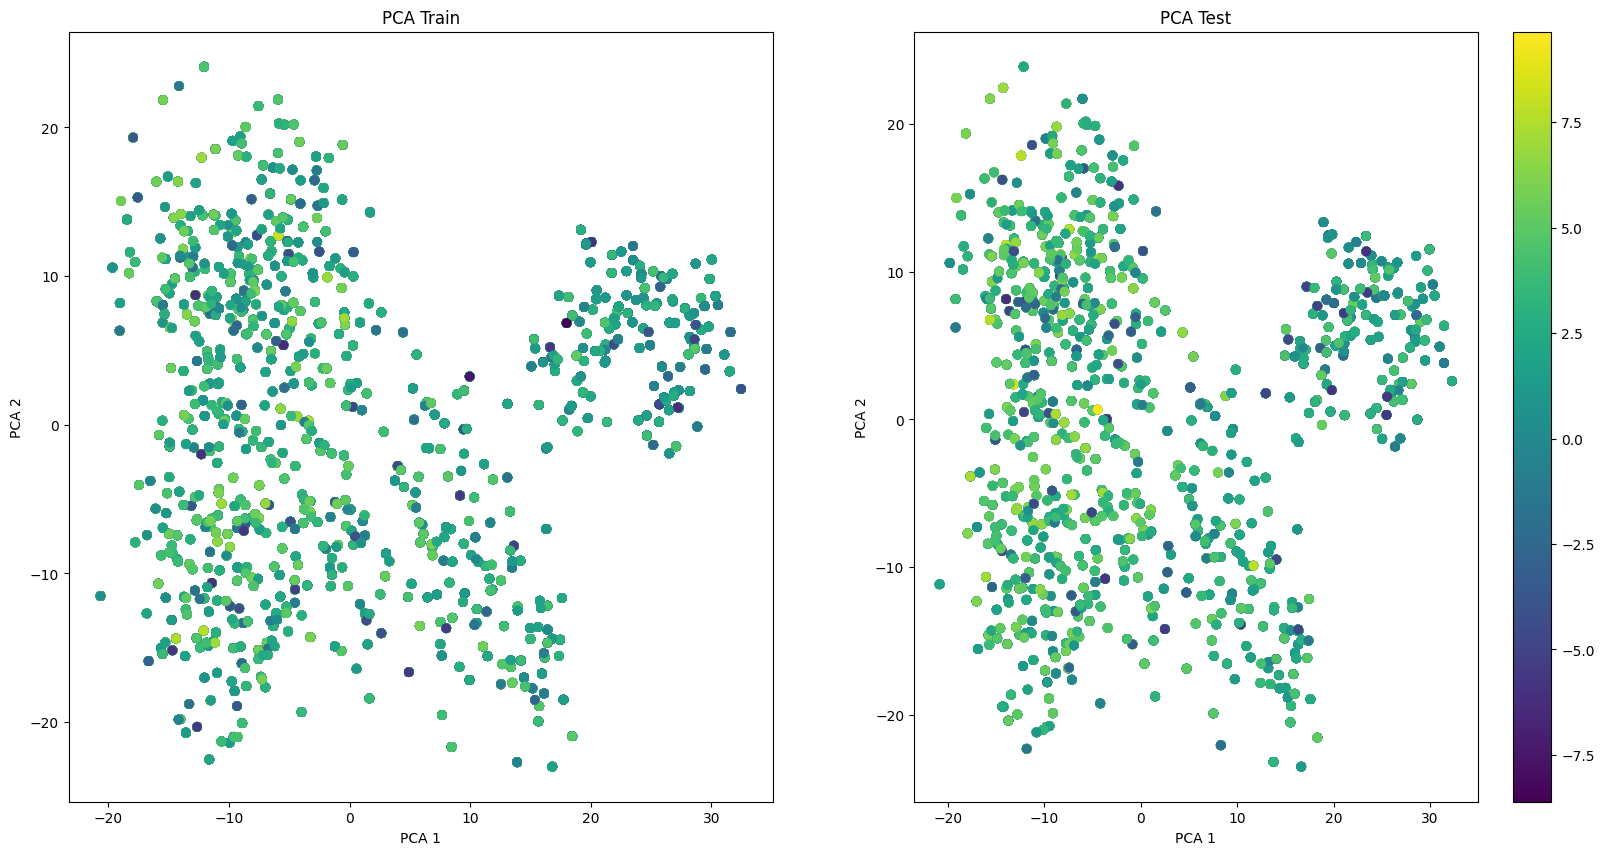

In [234]:
#plot and compare
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_train, cmap='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA Train')
plt.subplot(1, 2, 2)
plt.scatter(x_test_pca[:, 0], x_test_pca[:, 1], c=y_test, cmap='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA Test')
plt.colorbar()
plt.show()


In the PCA plot, it is possible to see that the data is very sparse not allowing for a clear separation of the data.

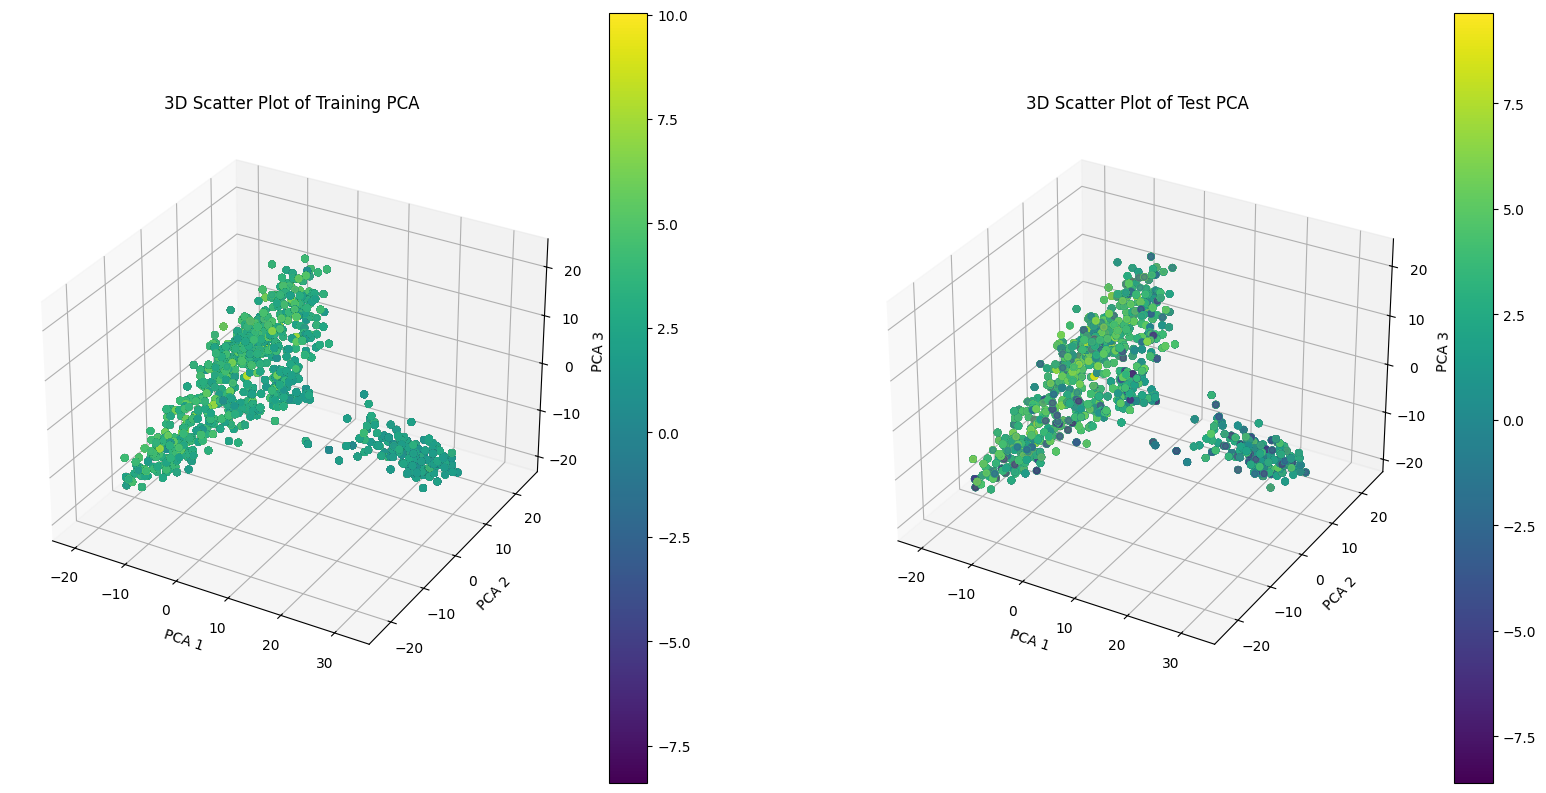

In [235]:
from mpl_toolkits.mplot3d import Axes3D

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10), subplot_kw={'projection':'3d'})

# Assuming that your classes are stored in y_train and y_test
scatter1 = ax1.scatter(x_train_pca[:, 0], x_train_pca[:, 1], x_train_pca[:, 2], c=y_train, cmap='viridis')
scatter2 = ax2.scatter(x_test_pca[:, 0], x_test_pca[:, 1], x_test_pca[:, 2], c=y_test, cmap='viridis')

ax1.set_xlabel("PCA 1")
ax1.set_ylabel("PCA 2")
ax1.set_zlabel("PCA 3")
ax1.set_title('3D Scatter Plot of Training PCA')

ax2.set_xlabel("PCA 1")
ax2.set_ylabel("PCA 2")
ax2.set_zlabel("PCA 3")
ax2.set_title('3D Scatter Plot of Test PCA')

fig.colorbar(scatter1, ax=ax1)
fig.colorbar(scatter2, ax=ax2)

plt.show()